# Goodreads Rating Prediction Using Linear Regression

#### The goal of this analysis is to predict book rating and to understand what are the important factors that make a book more popular than others. The sections of this analysis include:
#### Data Exploration
#### Data Cleaning
#### Data Visualisation
#### Data Preprocessing
#### Machine Learning Model 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

### Data Exploration

In [3]:
# read the data
data = pd.read_csv('books.csv', error_bad_lines = False)


C:\Users\hp\AppData\Local\Temp\ipykernel_9828\1437790168.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('books.csv', error_bad_lines = False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


### Data Exploration

In [4]:
df = pd.DataFrame(data)
print('Dimensiones del df:', df.shape)

# check basic features and data types
df.drop_duplicates(inplace = True)
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'tipo de la columna'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'campos nulos (cant)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'campos nulos (%)'}))
display(tab_info)
#__________________
#
display(df[:5])
print(df.describe())
print(df.info())

# show the first few rows
print(df.head(5))

Dimensiones del df: (11123, 12)


C:\Users\hp\AppData\Local\Temp\ipykernel_9828\1427891176.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'campos nulos (cant)'}))
C:\Users\hp\AppData\Local\Temp\ipykernel_9828\1427891176.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
tipo de la columna,int64,object,object,float64,object,int64,object,int64,int64,int64,object,object
campos nulos (cant),0,0,0,0,0,0,0,0,0,0,0,0
campos nulos (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


             bookID  average_rating        isbn13     num_pages  \
count  11123.000000    11123.000000  1.112300e+04  11123.000000   
mean   21310.856963        3.934075  9.759880e+12    336.405556   
std    13094.727252        0.350485  4.429758e+11    241.152626   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10277.500000        3.770000  9.780345e+12    192.000000   
50%    20287.000000        3.960000  9.780582e+12    299.000000   
75%    32104.500000        4.140000  9.780872e+12    416.000000   
max    45641.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count  
count   1.112300e+04        11123.000000  
mean    1.794285e+04          542.048099  
std     1.124992e+05         2576.619589  
min     0.000000e+00            0.000000  
25%     1.040000e+02            9.000000  
50%     7.450000e+02           47.000000  
75%     5.000500e+03          238.000000  
max     4.597666e+06        94265.000000  
<class 'p

In [5]:
# check no. of records
len(data)

11123

### Data Cleaning

In [6]:
# check for doublications
data.duplicated().any()

False

<AxesSubplot:>

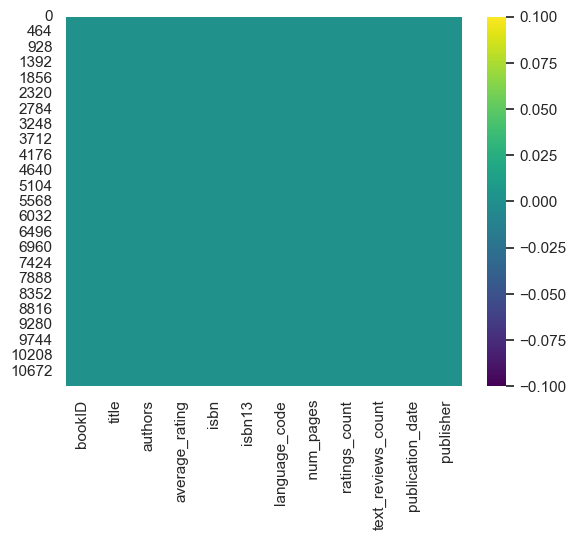

In [7]:
#  heatmap to visualise above result
sns.heatmap(data.isnull(), cmap='viridis')


### Data Visualisation

Text(0, 0.5, 'Frequency')

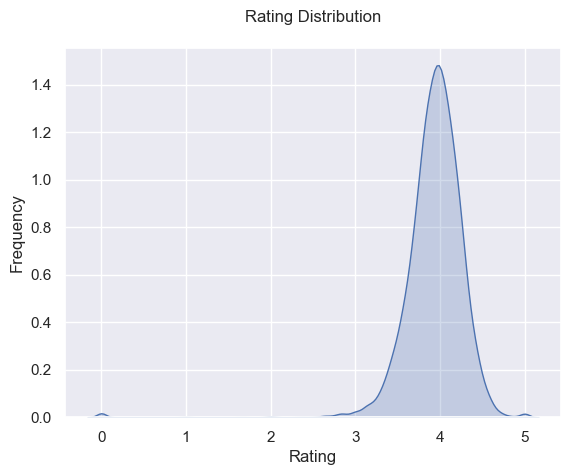

In [8]:
# ratings distribution
sns.kdeplot(data['average_rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

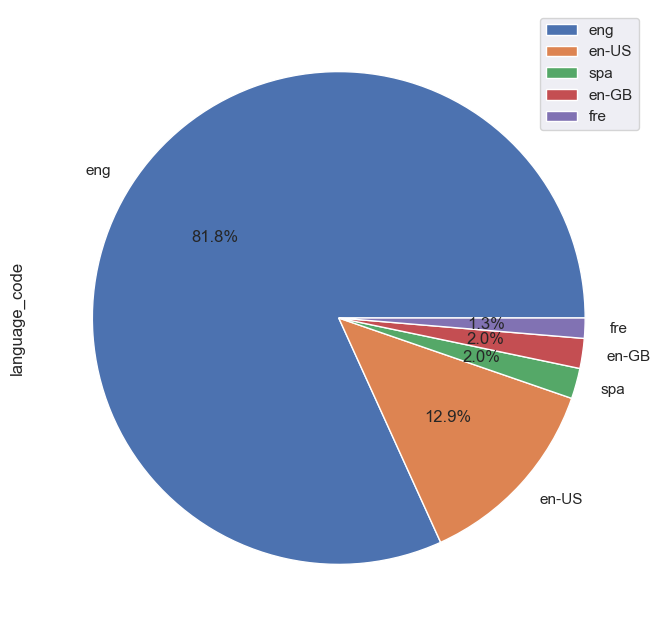

In [9]:
# top 5 languages
data['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '3.82'),
  Text(1, 0, '3.83'),
  Text(2, 0, '3.89'),
  Text(3, 0, '3.92'),
  Text(4, 0, '3.93'),
  Text(5, 0, '3.94'),
  Text(6, 0, '3.96'),
  Text(7, 0, '3.97'),
  Text(8, 0, '3.98'),
  Text(9, 0, '3.99'),
  Text(10, 0, '4.0'),
  Text(11, 0, '4.02'),
  Text(12, 0, '4.04'),
  Text(13, 0, '4.05'),
  Text(14, 0, '4.07')])

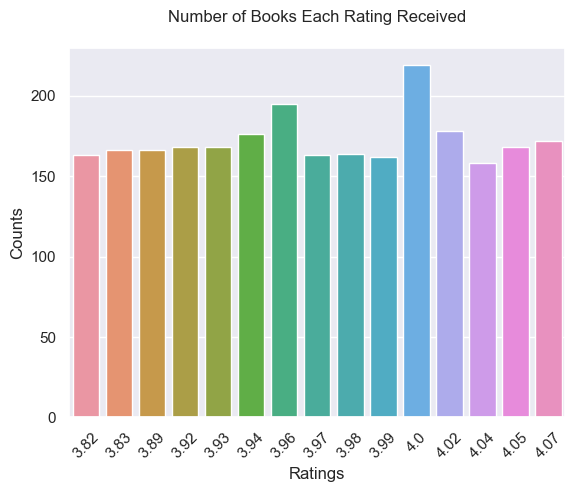

In [10]:
# number of books per rating
sns.barplot(data['average_rating'].value_counts().head(15).index, data['average_rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

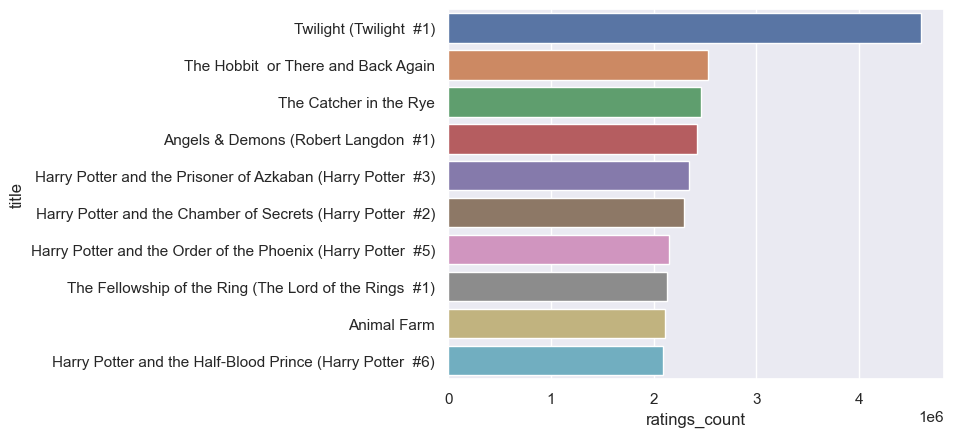

In [11]:
# highest rated books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

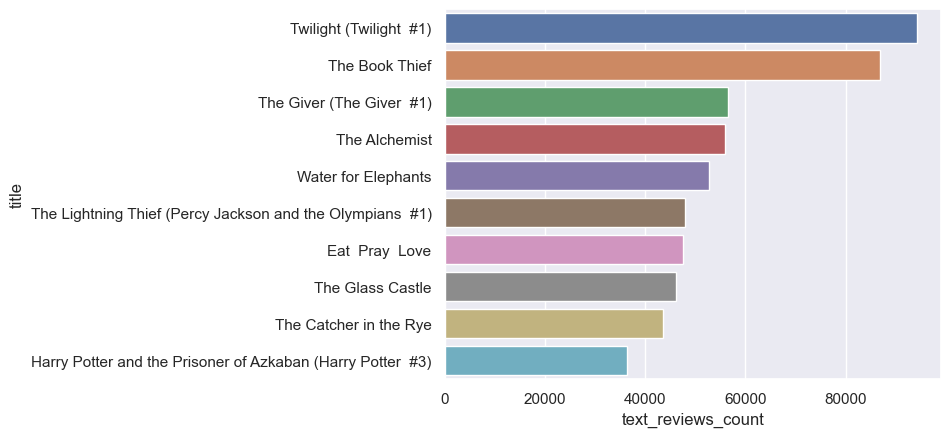

In [12]:
# highest reviewed books
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

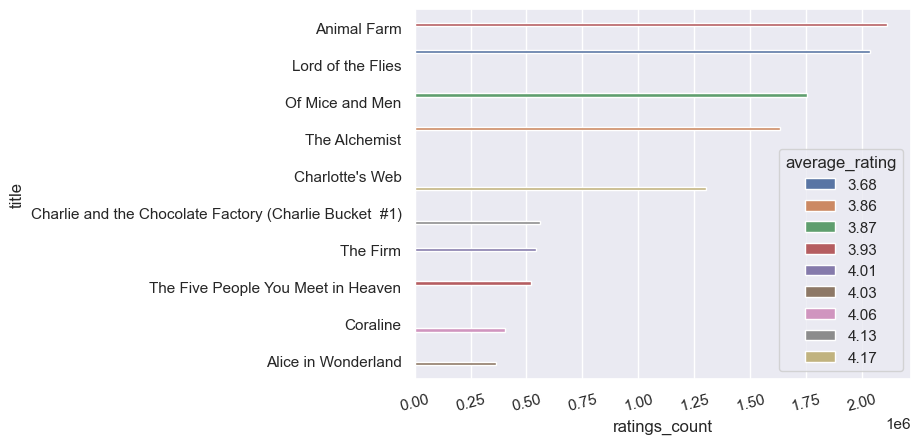

In [13]:
# top 10 books under 200 pages for busy book lovers
under200 = data[data['  num_pages'] <= 200]
top10under200 = under200.nlargest(10, ['ratings_count'])
sns.barplot(top10under200['ratings_count'], top10under200['title'], hue=top10under200['average_rating'])
plt.xticks(rotation=15)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='  num_pages', ylabel='title'>

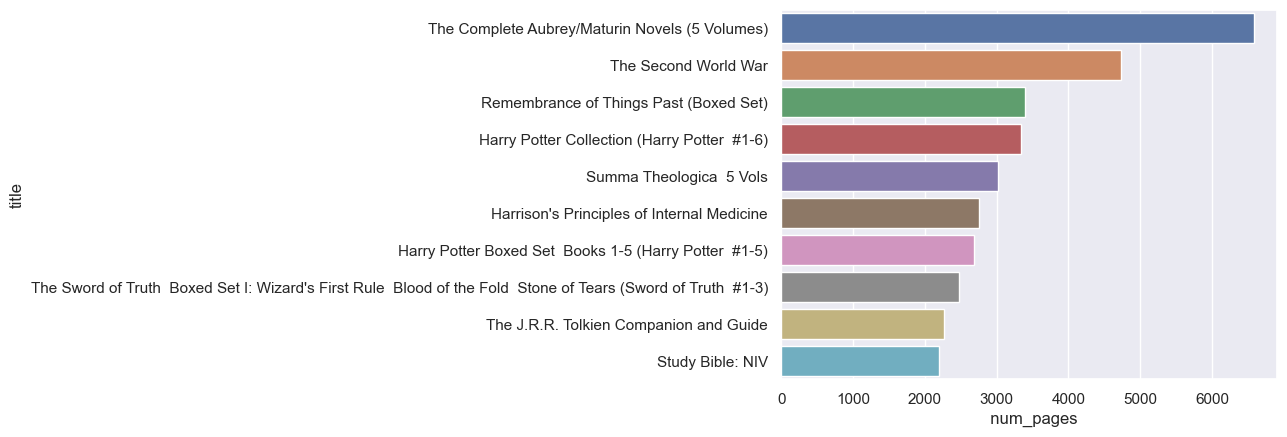

In [14]:
# top 10 longest books
longest_books = data.nlargest(10, ['  num_pages']).set_index('title')
sns.barplot(longest_books['  num_pages'], longest_books.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'eng'),
  Text(1, 0, 'en-US'),
  Text(2, 0, 'spa'),
  Text(3, 0, 'en-GB'),
  Text(4, 0, 'fre'),
  Text(5, 0, 'ger'),
  Text(6, 0, 'jpn'),
  Text(7, 0, 'mul'),
  Text(8, 0, 'zho'),
  Text(9, 0, 'grc'),
  Text(10, 0, 'por'),
  Text(11, 0, 'en-CA'),
  Text(12, 0, 'ita'),
  Text(13, 0, 'enm'),
  Text(14, 0, 'lat'),
  Text(15, 0, 'swe'),
  Text(16, 0, 'rus'),
  Text(17, 0, 'srp'),
  Text(18, 0, 'nl'),
  Text(19, 0, 'msa'),
  Text(20, 0, 'glg'),
  Text(21, 0, 'wel'),
  Text(22, 0, 'ara'),
  Text(23, 0, 'nor'),
  Text(24, 0, 'tur'),
  Text(25, 0, 'gla'),
  Text(26, 0, 'ale')])

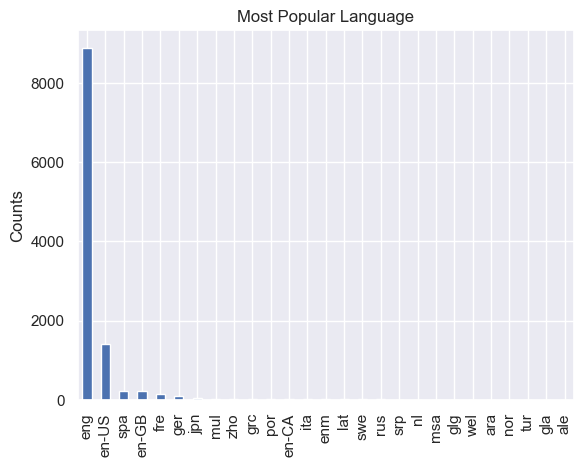

In [15]:
# top languages
df['language_code'].value_counts().plot(kind='bar')
plt.title('Most Popular Language')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of Publications')

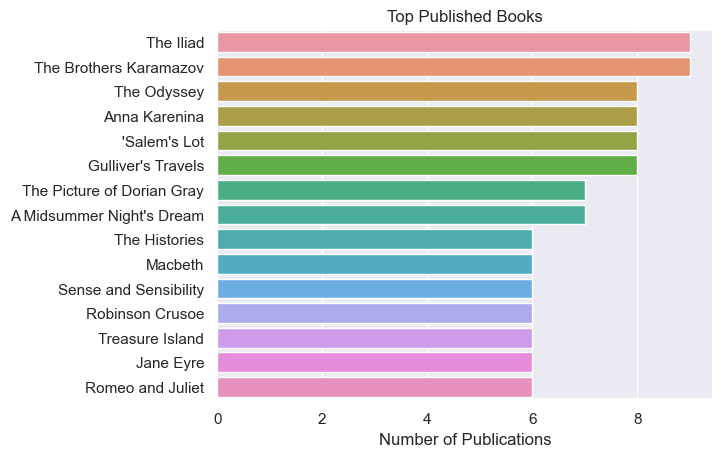

In [16]:
# top published books
sns.barplot(data['title'].value_counts()[:15], data['title'].value_counts().index[:15])
plt.title('Top Published Books')
plt.xlabel('Number of Publications')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Total Ratings')

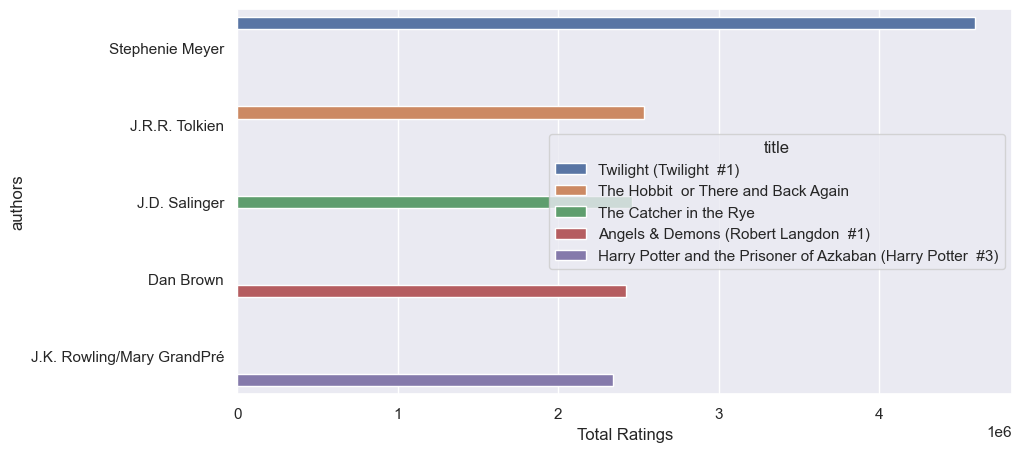

In [17]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'No. of Publications')

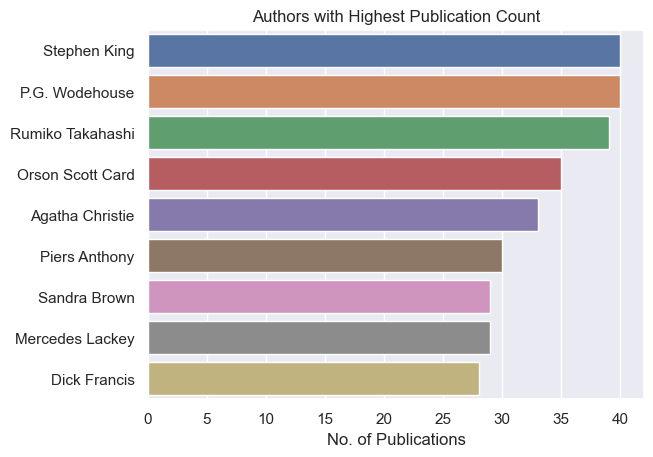

In [18]:
# authors with highest publications
top_authors = data['authors'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')

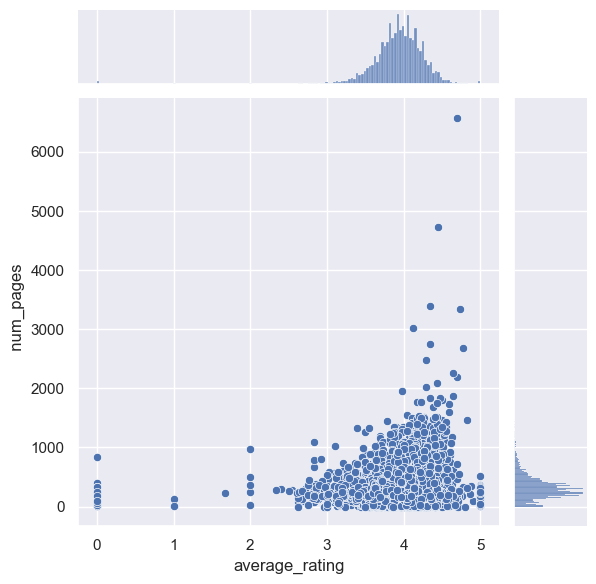

In [19]:
# visualise a bivariate distribution between ratings & no. of pages
sns.jointplot(x = 'average_rating', y = '  num_pages', data = data)

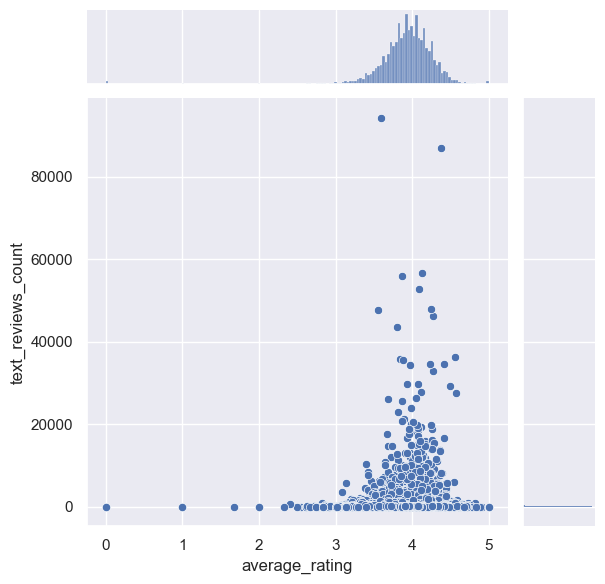

In [20]:
# visualise a bivariate distribution between ratings & no. of reviews
sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = data)

### Data Preprocessing
#### Data preprocessing is the conversion of data into machine-readable form can be interpreted, analysed and used by machine learning algorithms. In this analysis we will apply anomaly detection and feature engineering techniques.

### 1) Anomaly Detection

<AxesSubplot:xlabel='  num_pages'>

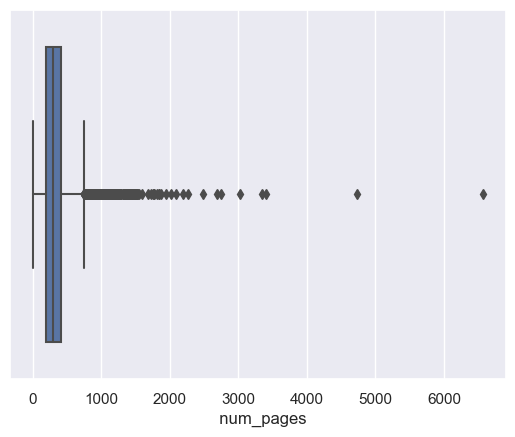

In [21]:
# find no. of pages outliers
sns.boxplot(x=data['  num_pages'])

Above plot shows points between 1,000 to 6,000, these are outliers as there are not included 
in the box of other observation i.e no where near the quartiles.


In [22]:
# remove outliers from no. of pages 
data = data.drop(data.index[data['  num_pages'] >= 1000])

<AxesSubplot:xlabel='ratings_count'>

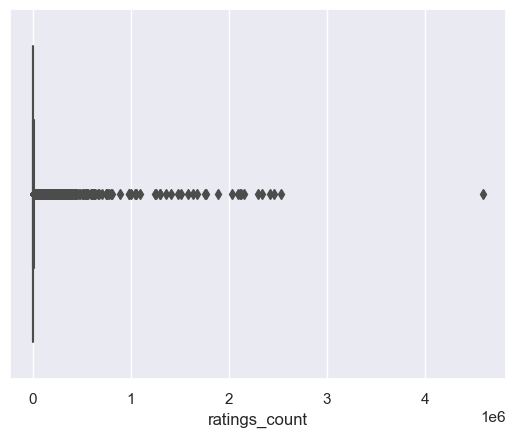

In [23]:
# find ratings count outliers
sns.boxplot(x=data['ratings_count'])

In [24]:
# remove outliers from ratings_count
data = data.drop(data.index[data['ratings_count'] >= 1000000])

In [25]:
# remove outliers from text_reviews_count
data = data.drop(data.index[data['text_reviews_count'] >= 20000])

### 2) Feature Engineering

Feature engineering is the process of selecting and transforming variables when creating a predictive model. Many machine learning algorithms require that their input is numerical and therefore categorical features such as title, authors and language code must be transformed into numerical features before we can use any of these algorithms.

In [26]:
# encode title column
le = preprocessing.LabelEncoder()
data['title'] = le.fit_transform(data['title'])

In [27]:
# encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [28]:
# encode language column
enc_lang = pd.get_dummies(data['language_code'])
data = pd.concat([data, enc_lang], axis = 1)

### Machine Learning Model

The aim of this section is to come up with a model for predicting the book ratings. We'll use linear regression to build a model that predicts book ratings.

In [32]:
# divide the data into attributes and labels
X = data.drop(['average_rating', 'language_code', 'isbn','publication_date','publisher'], axis = 1)
y = data['average_rating']

# Attributes are the independent variables whilst labels are dependent variables
# whose values are to be predicted.

In [33]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

To train our algorithm, we need to import LinearRegression 
class instantiate it, and call the fit() method along with the training data.

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

To use the test data to check accurately our algorithm predicts the percentage score.

In [35]:
predictions = lr.predict(X_test)

To compare the actual output values for X_test with the predicted values.

In [36]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.87,3.915673
1,4.21,4.191948
2,4.00,3.955157
3,3.77,3.945880
4,3.78,3.882488
5,3.96,3.923826
6,4.06,3.878638
7,4.42,3.938016
8,3.92,3.926594
9,3.57,3.992273


<AxesSubplot:>

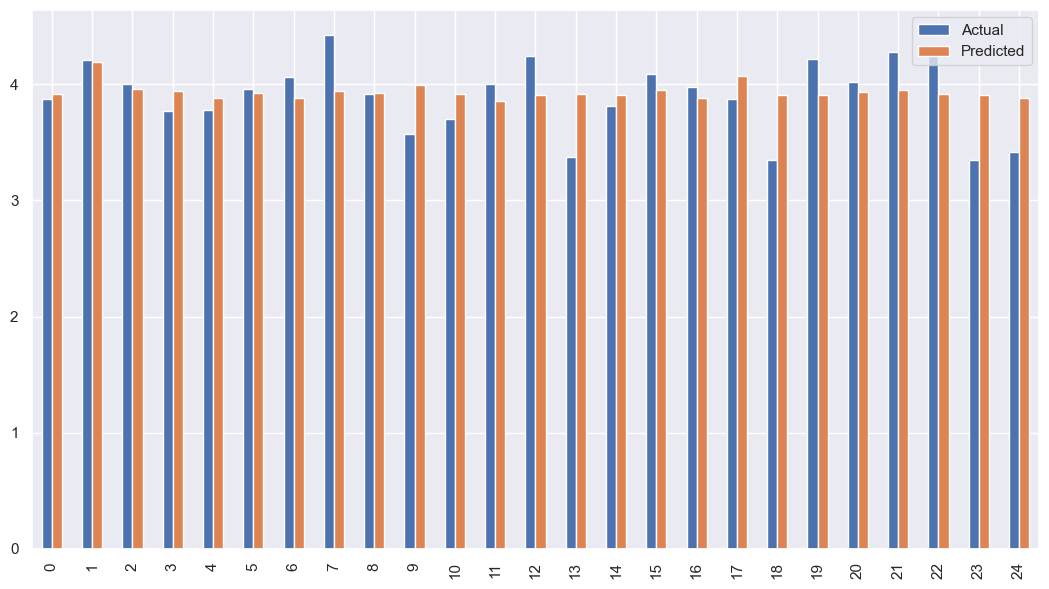

In [37]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

Though the model is not very precise, the predicted percentages are close to the actual ones.

In [38]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.23463843392604625
MSE: 0.14812844059157843
RMSE: 0.38487457774134476
